# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [13]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 3)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_labels = load_dataset('../data/train')
valid_files, valid_labels = load_dataset('../data/valid')

# load list of skin condition names
skin_names = [item[14:-1] for item in sorted(glob("../data/train/*/"))]



In [14]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [15]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors1 = paths_to_tensor(train_files).astype('float32')/255
valid_tensors1 = paths_to_tensor(valid_files).astype('float32')/255


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:33<00:00,  4.49it/s]


NameError: name 'test_files' is not defined

In [19]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(224, 224, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=48, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 224, 224, 32)      1056      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 48)      13872     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 48)      20784     
__________

### Compile the Model

In [20]:
from keras import optimizers
opt = optimizers.rmsprop(lr=0.00005, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [9]:
# Augmenting training data
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    rotation_range=30, # randomly rotate images up to 30 degrees
    zoom_range=0.1, # randomly zoom in and out by 10%
    horizontal_flip=True) # randomly flip images horizontally

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    rotation_range=30, # randomly rotate images up to 30 degrees
    zoom_range=0.1, # randomly zoom in and out by 10%
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(train_tensors1)
datagen_valid.fit(valid_tensors1)

In [21]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(valid_tensors1, valid_labels,
            validation_data=(valid_tensors1, valid_labels),
            epochs=epochs,
            batch_size=20,
            callbacks=[checkpointer],
            verbose=1)

Train on 150 samples, validate on 150 samples
Epoch 1/50
150/150 [==============================] - 3s - loss: 1.0534 - acc: 0.5133 - val_loss: 1.0483 - val_acc: 0.5200
Epoch 2/50
150/150 [==============================] - 3s - loss: 1.0208 - acc: 0.5200 - val_loss: 1.0418 - val_acc: 0.5200
Epoch 3/50
150/150 [==============================] - 3s - loss: 1.0189 - acc: 0.5200 - val_loss: 1.0281 - val_acc: 0.5200
Epoch 4/50
150/150 [==============================] - 3s - loss: 1.0195 - acc: 0.5200 - val_loss: 1.0457 - val_acc: 0.5200
Epoch 5/50
150/150 [==============================] - 3s - loss: 1.0131 - acc: 0.5200 - val_loss: 1.0346 - val_acc: 0.5200
Epoch 6/50
150/150 [==============================] - 3s - loss: 1.0087 - acc: 0.5200 - val_loss: 1.0295 - val_acc: 0.5200
Epoch 7/50
150/150 [==============================] - 3s - loss: 0.9962 - acc: 0.5200 - val_loss: 1.0253 - val_acc: 0.5200
Epoch 8/50
150/150 [==============================] - 3s - loss: 0.9837 - acc: 0.5200 - val_l

150/150 [==============================] - 3s - loss: 0.9819 - acc: 0.5200 - val_loss: 0.9857 - val_acc: 0.5200
Epoch 17/50
150/150 [==============================] - 3s - loss: 0.9739 - acc: 0.5200 - val_loss: 1.0081 - val_acc: 0.5200
Epoch 18/50
150/150 [==============================] - 3s - loss: 0.9767 - acc: 0.5200 - val_loss: 1.0126 - val_acc: 0.5200
Epoch 19/50
150/150 [==============================] - 3s - loss: 0.9676 - acc: 0.5200 - val_loss: 1.0004 - val_acc: 0.5200
Epoch 20/50
150/150 [==============================] - 3s - loss: 0.9594 - acc: 0.5200 - val_loss: 0.9744 - val_acc: 0.5200
Epoch 21/50
150/150 [==============================] - 3s - loss: 0.9667 - acc: 0.5200 - val_loss: 0.9887 - val_acc: 0.5200
Epoch 22/50
150/150 [==============================] - 3s - loss: 0.9583 - acc: 0.5200 - val_loss: 0.9705 - val_acc: 0.5200
Epoch 23/50
150/150 [==============================] - 3s - loss: 0.9440 - acc: 0.5267 - val_loss: 0.9556 - val_acc: 0.5267
Epoch 24/50
150/150 

150/150 [==============================] - 3s - loss: 0.8930 - acc: 0.5733 - val_loss: 0.9406 - val_acc: 0.6533
Epoch 33/50
150/150 [==============================] - 3s - loss: 0.8966 - acc: 0.6133 - val_loss: 0.9479 - val_acc: 0.6533
Epoch 34/50
150/150 [==============================] - 3s - loss: 0.8613 - acc: 0.6533 - val_loss: 0.9522 - val_acc: 0.6800
Epoch 35/50
150/150 [==============================] - 3s - loss: 0.8942 - acc: 0.6133 - val_loss: 1.0243 - val_acc: 0.5200
Epoch 36/50
150/150 [==============================] - 3s - loss: 0.8925 - acc: 0.6267 - val_loss: 0.9093 - val_acc: 0.6400
Epoch 37/50
150/150 [==============================] - 3s - loss: 0.8720 - acc: 0.6333 - val_loss: 0.9817 - val_acc: 0.6200
Epoch 38/50
150/150 [==============================] - 3s - loss: 0.9025 - acc: 0.6200 - val_loss: 0.9791 - val_acc: 0.6133
Epoch 39/50
150/150 [==============================] - 3s - loss: 0.8728 - acc: 0.6267 - val_loss: 0.9635 - val_acc: 0.6333
Epoch 40/50
150/150 

150/150 [==============================] - 3s - loss: 0.8185 - acc: 0.6333 - val_loss: 0.9504 - val_acc: 0.6200
Epoch 49/50
150/150 [==============================] - 3s - loss: 0.8188 - acc: 0.6533 - val_loss: 0.8593 - val_acc: 0.6933
Epoch 50/50
150/150 [==============================] - 3s - loss: 0.8216 - acc: 0.6733 - val_loss: 0.8362 - val_acc: 0.6667


### Load the Model with the Best Validation Loss

In [15]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [16]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 13.8756%


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [17]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']


### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [18]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [19]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [20]:
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s - loss: 12.0881 - acc: 0.1289 - val_loss: 10.6872 - val_acc: 0.2060
Epoch 2/20
6680/6680 [==============================] - 2s - loss: 9.8895 - acc: 0.2970 - val_loss: 9.9969 - val_acc: 0.2850
Epoch 3/20
6680/6680 [==============================] - 2s - loss: 9.4853 - acc: 0.3525 - val_loss: 9.7929 - val_acc: 0.3090
Epoch 4/20
6680/6680 [==============================] - 2s - loss: 9.2685 - acc: 0.3778 - val_loss: 9.7685 - val_acc: 0.3042
Epoch 5/20
6680/6680 [==============================] - 2s - loss: 9.1523 - acc: 0.4015 - val_loss: 9.6838 - val_acc: 0.3174
Epoch 6/20
6680/6680 [==============================] - 2s - loss: 8.9926 - acc: 0.4144 - val_loss: 9.5344 - val_acc: 0.3281
Epoch 7/20
6680/6680 [==============================] - 2s - loss: 8.8412 - acc: 0.4244 - val_loss: 9.3126 - val_acc: 0.3341
Epoch 8/20
6680/6680 [==============================] - 2s - loss: 8.7085 - 

Epoch 10/20
6680/6680 [==============================] - 2s - loss: 8.5953 - acc: 0.4539 - val_loss: 9.2034 - val_acc: 0.3521
Epoch 11/20
6680/6680 [==============================] - 2s - loss: 8.4708 - acc: 0.4611 - val_loss: 9.0680 - val_acc: 0.3665
Epoch 12/20
6680/6680 [==============================] - 2s - loss: 8.3802 - acc: 0.4687 - val_loss: 9.0647 - val_acc: 0.3533
Epoch 13/20
6680/6680 [==============================] - 2s - loss: 8.3360 - acc: 0.4728 - val_loss: 9.0189 - val_acc: 0.3665
Epoch 14/20
6680/6680 [==============================] - 2s - loss: 8.3019 - acc: 0.4765 - val_loss: 8.9490 - val_acc: 0.3701
Epoch 15/20
6680/6680 [==============================] - 2s - loss: 8.2660 - acc: 0.4789 - val_loss: 8.9273 - val_acc: 0.3725
Epoch 16/20
6680/6680 [==============================] - 2s - loss: 8.2430 - acc: 0.4834 - val_loss: 8.9087 - val_acc: 0.3749
Epoch 17/20
6680/6680 [==============================] - 2s - loss: 8.2320 - acc: 0.4849 - val_loss: 8.9442 - val_acc:

6680/6680 [==============================] - 2s - loss: 8.2287 - acc: 0.4856 - val_loss: 8.8919 - val_acc: 0.3820
Epoch 19/20
6680/6680 [==============================] - 2s - loss: 8.2188 - acc: 0.4870 - val_loss: 8.8696 - val_acc: 0.3892
Epoch 20/20
6680/6680 [==============================] - 2s - loss: 8.2106 - acc: 0.4888 - val_loss: 8.9509 - val_acc: 0.3737


### Load the Model with the Best Validation Loss

In [21]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [22]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 39.3541%


### Predict Dog Breed with the Model

In [23]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [24]:
### TODO: Obtain bottleneck features from another pre-trained CNN.

bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_inception = bottleneck_features['train']
valid_inception = bottleneck_features['valid']
test_inception = bottleneck_features['test']

print(train_inception.shape)

(6680, 5, 5, 2048)


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ Dog images are a subset of the ImageNet database so I consider dog pictures to be similar to imagenet training data. At 7000 images, this is a relatively small training dataset. Therefore I believe that an "end of convnet" approach that replaces the top, fully connected layer is the right approach.

As a basic global average pooling layer far outperforms the required 60% accuracy target, I don't feel the need to over-engineer the solution beyond this :)



In [25]:
### TODO: Define your architecture.

dog_inception = Sequential()
dog_inception.add(GlobalAveragePooling2D(input_shape=train_inception.shape[1:]))
dog_inception.add(Dense(133, activation="softmax"))


dog_inception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [26]:
### TODO: Compile the model.

opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)
dog_inception.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [27]:
### TODO: Train the model.

epochs = 20

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Inception.hdf5', 
                               verbose=1, save_best_only=True)

dog_inception.fit(train_inception, train_targets, 
          validation_data=(valid_inception, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)


Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 3s - loss: 2.8026 - acc: 0.4422 - val_loss: 1.2239 - val_acc: 0.7281
Epoch 2/20
6680/6680 [==============================] - 3s - loss: 0.8477 - acc: 0.7874 - val_loss: 0.6785 - val_acc: 0.8120
Epoch 3/20
6680/6680 [==============================] - 3s - loss: 0.5615 - acc: 0.8364 - val_loss: 0.5593 - val_acc: 0.8263
Epoch 4/20
6680/6680 [==============================] - 3s - loss: 0.4690 - acc: 0.8617 - val_loss: 0.5211 - val_acc: 0.8419
Epoch 5/20
6680/6680 [==============================] - 3s - loss: 0.4184 - acc: 0.8719 - val_loss: 0.4978 - val_acc: 0.8431
Epoch 6/20
6680/6680 [==============================] - 3s - loss: 0.3849 - acc: 0.8823 - val_loss: 0.4885 - val_acc: 0.8491
Epoch 7/20


6680/6680 [==============================] - 3s - loss: 0.3609 - acc: 0.8883 - val_loss: 0.4813 - val_acc: 0.8479
Epoch 8/20
6680/6680 [==============================] - 3s - loss: 0.3425 - acc: 0.8913 - val_loss: 0.4771 - val_acc: 0.8527
Epoch 9/20
6680/6680 [==============================] - 3s - loss: 0.3261 - acc: 0.8994 - val_loss: 0.4747 - val_acc: 0.8539
Epoch 10/20
6680/6680 [==============================] - 3s - loss: 0.3126 - acc: 0.8994 - val_loss: 0.4681 - val_acc: 0.8611
Epoch 11/20
6680/6680 [==============================] - 3s - loss: 0.3017 - acc: 0.9072 - val_loss: 0.4686 - val_acc: 0.8599
Epoch 12/20
6680/6680 [==============================] - 3s - loss: 0.2903 - acc: 0.9085 - val_loss: 0.4770 - val_acc: 0.8587
Epoch 13/20


6680/6680 [==============================] - 3s - loss: 0.2841 - acc: 0.9102 - val_loss: 0.4805 - val_acc: 0.8635
Epoch 14/20
6680/6680 [==============================] - 3s - loss: 0.2749 - acc: 0.9144 - val_loss: 0.4784 - val_acc: 0.8635
Epoch 15/20
6680/6680 [==============================] - 3s - loss: 0.2669 - acc: 0.9175 - val_loss: 0.4904 - val_acc: 0.8647
Epoch 16/20
6680/6680 [==============================] - 3s - loss: 0.2591 - acc: 0.9183 - val_loss: 0.4832 - val_acc: 0.8671
Epoch 17/20
6680/6680 [==============================] - 3s - loss: 0.2528 - acc: 0.9210 - val_loss: 0.4798 - val_acc: 0.8719
Epoch 18/20
6680/6680 [==============================] - 3s - loss: 0.2467 - acc: 0.9226 - val_loss: 0.4909 - val_acc: 0.8635
Epoch 19/20


6680/6680 [==============================] - 3s - loss: 0.2415 - acc: 0.9235 - val_loss: 0.5015 - val_acc: 0.8587
Epoch 20/20
6680/6680 [==============================] - 3s - loss: 0.2367 - acc: 0.9263 - val_loss: 0.5052 - val_acc: 0.8599


### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [28]:
### TODO: Load the model weights with the best validation loss.

dog_inception.load_weights('saved_models/weights.best.Inception.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [29]:
### TODO: Calculate classification accuracy on the test dataset.

inception_predictions = [np.argmax(dog_inception.predict(np.expand_dims(feature, axis=0))) for feature in test_inception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(inception_predictions)==np.argmax(test_targets, axis=1))/len(inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.6220%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [30]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

def inception_predict_breed(img_path):
    bottleneck_features = extract_InceptionV3(path_to_tensor(img_path))
    index = np.argmax(dog_inception.predict(bottleneck_features))
    probability = np.max(dog_inception.predict(bottleneck_features))
    return dog_names[index], probability


---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [31]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def breed_predictor(img_path):
    if dog_detector(img_path) and not face_detector(img_path):
        print("Dog detected")
        breed, probability = inception_predict_breed(img_path)
        return "Hmmm...I'm {:.1%} sure that this breed of dog is a {}".format(probability, breed)
    
    if face_detector(img_path) and not dog_detector(img_path):
        print("Human detected")
        breed, probability = inception_predict_breed(img_path)
        return "The dog breed you look most like is a {}".format(breed)
    
    else:
        return "I'm not sure what I'm looking at"
    

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The model is pretty good with identifying breeds of dog. Lassie was accurately identified as a collie. "Doge" is a Shiba Inu, a breed not included in the labels. The model identified it as an Akita, a closely related dog which a human would have difficulty distinguishing between. However, when characterising the type of dog a human most looks like, it is very hard to see any resemblance. Three points of improvement:
- A way to highlight why a human is determined to resemble a particular breed of dog, perhaps through visualising filters
- Better error catching. If a photo is rejected is it because it is not a human or dog, or because it is being identified as both. If the latter, we could ask the user to clarify if it is a human or a dog.
- Below a certain accuracy threshold, we can add 2nd guesses or raise the possibility of mixed breeds



Human detected
The dog breed you look most like is a Icelandic_sheepdog


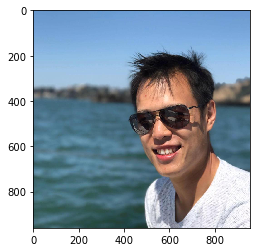

In [32]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
link = 'my_images/me.jpg'
img = cv2.imread(link)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(breed_predictor(link))    


Human detected
The dog breed you look most like is a Doberman_pinscher


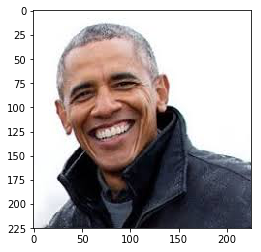

In [33]:
link = 'my_images/obama.jpg'
img = cv2.imread(link)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(breed_predictor(link)) 

Human detected
The dog breed you look most like is a Chinese_crested


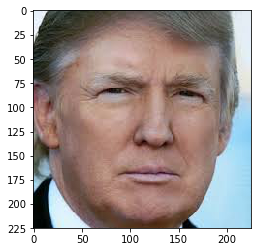

In [34]:
link = 'my_images/trump.jpg'
img = cv2.imread(link)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(breed_predictor(link)) 

Dog detected
Hmmm...I'm 95.2% sure that this breed of dog is a Collie


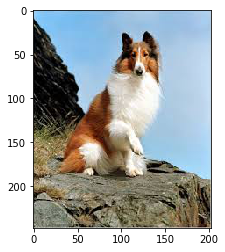

In [35]:
link = 'my_images/lassie.jpg'
img = cv2.imread(link)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(breed_predictor(link)) 

Dog detected
Hmmm...I'm 97.2% sure that this breed of dog is a Akita


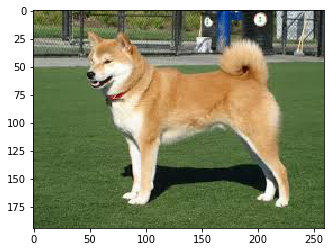

In [36]:
link = 'my_images/doge.jpg'
img = cv2.imread(link)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(breed_predictor(link)) 

I'm not sure what I'm looking at


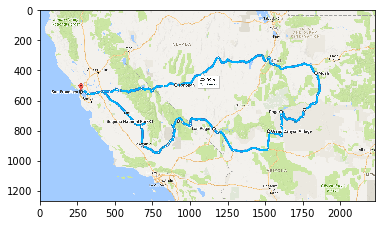

In [37]:
link = 'my_images/not_dog_or_human.jpg'
img = cv2.imread(link)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(breed_predictor(link)) 